In [14]:
import numpy as np
from metpy.cbook import get_test_data
import xarray as xr
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import metpy.calc as mpcalc
from metpy.units import units

In [15]:
ysu = xr.open_dataset("wrf_ysu_24112020_06.nc")

ph = ysu.metpy.parse_cf('PH')
phb = ysu.metpy.parse_cf('PHB')
hgt = ysu.metpy.parse_cf('HGT')
z = ((ph+phb)/9.81)-hgt
z = z.isel(Time=0)

lwc1 = ysu.metpy.parse_cf('QCLOUD')
lwc1 = lwc1.isel(Time=0)#.sel(bottom_top=0:16)
lwc1 = lwc1[:16,:,:]
ys1 = 0 # 0-0.1 g/m3
ys2 = 0
ys3 = 0
ys4 = 0
ys5 = 0
for i in range(0,1):
    for j in range(0,36):
        for k in range(0,39):
            if lwc1[i,j,k]>0 and lwc1[i,j,k]<0.0001:
                ys1 = float(ys1)+float(lwc1[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc1[i,j,k]>0.0001 and lwc1[i,j,k]<0.0002:
                ys2 = float(ys2)+float(lwc1[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc1[i,j,k]>0.0002 and lwc1[i,j,k]<0.0003:
                ys3 = float(ys3)+float(lwc1[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc1[i,j,k]>0.0003 and lwc1[i,j,k]<0.0004:
                ys4 = float(ys4)+float(lwc1[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc1[i,j,k]>0.0004 and lwc1[i,j,k]<lwc1.max():
                ys5 = float(ys5)+float(lwc1[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
f = open('tot_LWC.txt', 'w+')
f.write("\n YSU PBL \n")
f.write("ys1 = %.3f\r\n" % ys1)
f.write("ys2 = %.3f\r\n" % ys2)
f.write("ys3 = %.3f\r\n" % ys3)
f.write("ys4 = %.3f\r\n" % ys4)
f.write("ys5 = %.3f\r\n" % ys5)
f.close()


In [16]:
# MJY test
mjy = xr.open_dataset("wrf_myj_24112020_06.nc")

ph = mjy.metpy.parse_cf('PH')
phb = mjy.metpy.parse_cf('PHB')
hgt = mjy.metpy.parse_cf('HGT')
z = ((ph+phb)/9.81)-hgt
z = z.isel(Time=0)


lwc = (mjy.metpy.parse_cf('QCLOUD'))
lwc = lwc.isel(Time=0)#.sel(bottom_top=0:16)
lwc = lwc[:16,:,:]
mj1 = 0 # 0-0.1 g/m3
mj2 = 0
mj3 = 0
mj4 = 0
mj5 = 0
for i in range(0,1):
    for j in range(0,36):
        for k in range(0,39):
            if lwc[i,j,k]>0 and lwc[i,j,k]<0.0001:
                mj1 = float(mj1)+float(lwc[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc[i,j,k]>0.0001 and lwc[i,j,k]<0.0002:
                mj2 = float(mj2)+float(lwc[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc[i,j,k]>0.0002 and lwc[i,j,k]<0.0003:
                mj3 = float(mj3)+float(lwc[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc[i,j,k]>0.0003 and lwc[i,j,k]<0.0004:
                mj4 = float(mj4)+float(lwc[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc[i,j,k]>0.0004 and lwc[i,j,k]<lwc.max():
                mj5 = float(mj5)+float(lwc[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
f = open('tot_LWC.txt', 'a')
f.write("\n MYJ PBL \n")
f.write("mj1 = %.3f\r\n" % mj1)
f.write("mj2 = %.3f\r\n" % mj2)
f.write("mj3 = %.3f\r\n" % mj3)
f.write("mj4 = %.3f\r\n" % mj4)
f.write("mj5 = %.3f\r\n" % mj5)
f.close()

In [17]:
# QNSE test
qnse = xr.open_dataset("wrf_QNSE_24112020_06.nc")
ph = qnse.metpy.parse_cf('PH')
phb = qnse.metpy.parse_cf('PHB')
hgt = qnse.metpy.parse_cf('HGT')
z = ((ph+phb)/9.81)-hgt
z = z.isel(Time=0)
lwc2 = (qnse.metpy.parse_cf('QCLOUD'))
lwc2 = lwc2.isel(Time=0)#.sel(bottom_top=0:16)
lwc2 = lwc2[:16,:,:]
qn1 = 0 # 0-0.1 g/m3
qn2 = 0
qn3 = 0
qn4 = 0
qn5 = 0
for i in range(0,1):
    for j in range(0,36):
        for k in range(0,39):
            if lwc2[i,j,k]>0 and lwc2[i,j,k]<0.0001:
                qn1 = float(qn1)+float(lwc2[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc2[i,j,k]>0.0001 and lwc2[i,j,k]<0.0002:
                qn2 = float(qn2)+float(lwc2[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc2[i,j,k]>0.0002 and lwc2[i,j,k]<0.0003:
                qn3 = float(qn3)+float(lwc2[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc2[i,j,k]>0.0003 and lwc2[i,j,k]<0.0004:
                qn4 = float(qn4)+float(lwc2[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc2[i,j,k]>0.0004 and lwc2[i,j,k]<lwc2.max():
                qn5 = float(qn5)+float(lwc2[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
f = open('tot_LWC.txt', 'a')
f.write("\n QNSE PBL \n")
f.write("qn1 = %.3f\r\n" % qn1)
f.write("qn2 = %.3f\r\n" % qn2)
f.write("qn3 = %.3f\r\n" % qn3)
f.write("qn4 = %.3f\r\n" % qn4)
f.write("qn5 = %.3f\r\n" % qn5)
f.close()

In [18]:
# MYNN3 test
myn = xr.open_dataset("wrf_mynn3_24112020_06.nc")
ph = myn.metpy.parse_cf('PH')
phb = myn.metpy.parse_cf('PHB')
hgt = myn.metpy.parse_cf('HGT')
z = ((ph+phb)/9.81)-hgt
z = z.isel(Time=0)

lwc3 = (myn.metpy.parse_cf('QCLOUD'))
lwc3 = lwc3.isel(Time=0)#.sel(bottom_top=0:16)
lwc3 = lwc3[:16,:,:]
my1 = 0 # 0-0.1 g/m3
my2 = 0
my3 = 0
my4 = 0
my5 = 0
for i in range(0,1):
    for j in range(0,36):
        for k in range(0,39):
            if lwc3[i,j,k]>0 and lwc3[i,j,k]<0.0001:
                my1 = float(my1)+float(lwc3[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc3[i,j,k]>0.0001 and lwc3[i,j,k]<0.0002:
                my2 = float(my2)+float(lwc3[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc3[i,j,k]>0.0002 and lwc3[i,j,k]<0.0003:
                my3 = float(my3)+float(lwc3[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc3[i,j,k]>0.0003 and lwc3[i,j,k]<0.0004:
                my4 = float(my4)+float(lwc3[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
            if lwc3[i,j,k]>0.0004 and lwc3[i,j,k]<lwc3.max():
                my5 = float(my5)+float(lwc3[i,j,k])*2*2*(float(z[i+1,j,k])-float(z[i,j,k]))*1.22
f = open('tot_LWC.txt', 'a')
f.write("\n MYNN3 PBL \n")
f.write("my1 = %.3f\r\n" % my1)
f.write("my2 = %.3f\r\n" % my2)
f.write("my3 = %.3f\r\n" % my3)
f.write("my4 = %.3f\r\n" % my4)
f.write("my5 = %.3f\r\n" % my5)
f.close()
print(my1)

0.004916727287018797


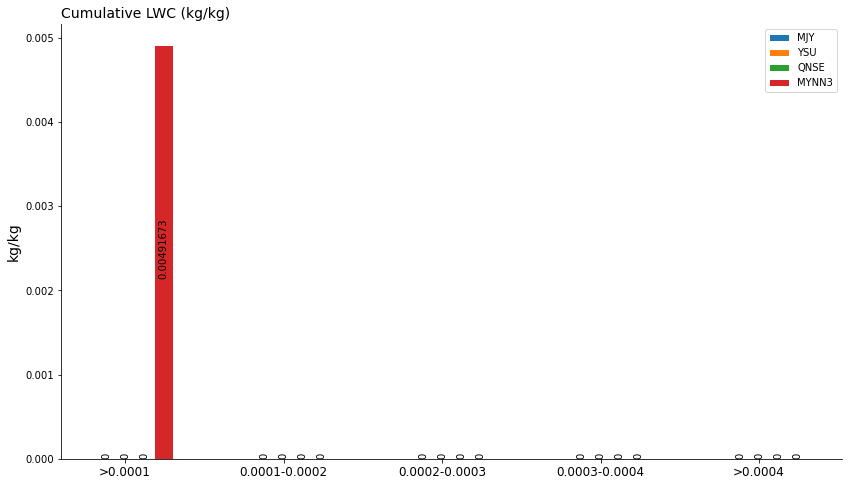

In [21]:
labels = ['>0.0001', '0.0001-0.0002', '0.0002-0.0003', '0.0003-0.0004', '>0.0004']
myj_lwc = [mj1, mj2, mj3, mj4, mj5]
ysu_lwc = [ys1,ys2,ys3,ys4,ys5]
qnse_lwc = [qn1,qn2,qn3,qn4,qn5]
mynn3_lwc = [my1,my2,my3,my4,my5]

# set width of bars
barWidth = 0.12

x0 = np.arange(len(labels))  # the label locations
x1 = [x + barWidth for x in x0]
x2 = [x + barWidth for x in x1]
x3 = [x + barWidth for x in x2]

# Make the plot
fig, ax = plt.subplots(figsize=(14, 8))

bar1 = plt.bar(x0, myj_lwc, width=barWidth, edgecolor='white', label='MJY')
bar2 = plt.bar(x1, ysu_lwc, width=barWidth, edgecolor='white', label='YSU')
bar3 = plt.bar(x2, qnse_lwc, width=barWidth, edgecolor='white', label='QNSE')
bar4 = plt.bar(x3, mynn3_lwc, width=barWidth, edgecolor='white', label='MYNN3')
 
# Add xticks on the middle of the group bars
# plt.xlabel('group', fontweight='bold')
plt.ylabel('kg/kg', fontsize=14)
plt.title('Cumulative LWC (kg/kg)', fontsize=14,loc='left')
plt.xticks([r + barWidth for r in range(len(myj_lwc))], labels, fontsize=12)

ax.bar_label(bar1, padding=3,label_type='center',rotation='90')#,color = 'w')
ax.bar_label(bar2, padding=3,label_type='center',rotation='90')#,color = 'w')
ax.bar_label(bar3, padding=3,label_type='center',rotation='90')#,color = 'w')
ax.bar_label(bar4, padding=3,label_type='center',rotation='90')#,color = 'w')

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

# Create legend & Show graphic
plt.legend(fontsize=10)
plt.savefig("cumulative_LWC.png",dpi=240) 
plt.show()
